# Automação e Inteligência na FarmTech Solutions

### Este sistema tem como objetivo analisar valores fornecidos por um sistema eletrônico, que monitora as quantidades de água, ph, potássio e fosforo no solo, deste modo o sistema vai classificar os valores de cada variável de modo que seja possível saber quantos dias os valores estiveram no intervalo desejado e quantos não. Além, disso o sistema possui um ML capaz de classificar os valores lidos pelo sensor em dois grupos sento 1, valores que estão abaixo do intervalo desejado, portanto o solo precisa ser irrigado, ou seja a bomba deve ser ligada e 0, para os valores que não necessitam de irrigação, portanto a bomba irá se manter deligada. Por fim cada variável possui 200 valores, represento 200 dias de monitoramento. 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Importando o dataset

In [2]:
df = pd.read_excel(r"C:\Users\pc\Desktop\BancoFase4.xlsx")
print(df)

      P   K    ph  Umidade  Irrigação
0    42  43  6.50    82.00          1
1    58  41  7.04    80.32          1
2    55  44  7.84    82.32          1
3    35  40  6.98    80.16          1
4    42  42  7.63    81.60          1
..   ..  ..   ...      ...        ...
195  57  45  7.12    89.13          0
196  35  41  6.43    83.53          0
197  54  45  7.16    83.70          0
198  58  39  6.43    86.69          0
199  57  37  6.08    83.49          0

[200 rows x 5 columns]


### Amostra do dataset

In [3]:
df.head(10)

,P,K,ph,Umidade,Irrigação
0,42,43,6.50,82.00,1
1,58,41,7.04,80.32,1
2,55,44,7.84,82.32,1
3,35,40,6.98,80.16,1
4,42,42,7.63,81.60,1
5,37,42,7.07,83.37,0
6,55,38,5.70,82.64,1
7,53,40,5.72,82.89,1
8,54,38,6.69,83.54,0
9,58,38,6.34,83.03,0


### Informações gerais do dataset
O dataset não possui valores nulos

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   P          200 non-null    int64  
 1   K          200 non-null    int64  
 2   ph         200 non-null    float64
 3   Umidade    200 non-null    float64
 4   Irrigação  200 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 7.9 KB


### Valores duplicados
O dataset não possui valores duplicados

In [6]:
duplicates = df.duplicated().sum()
print('Número de df duplicados:', duplicates)

Número de df duplicados: 0


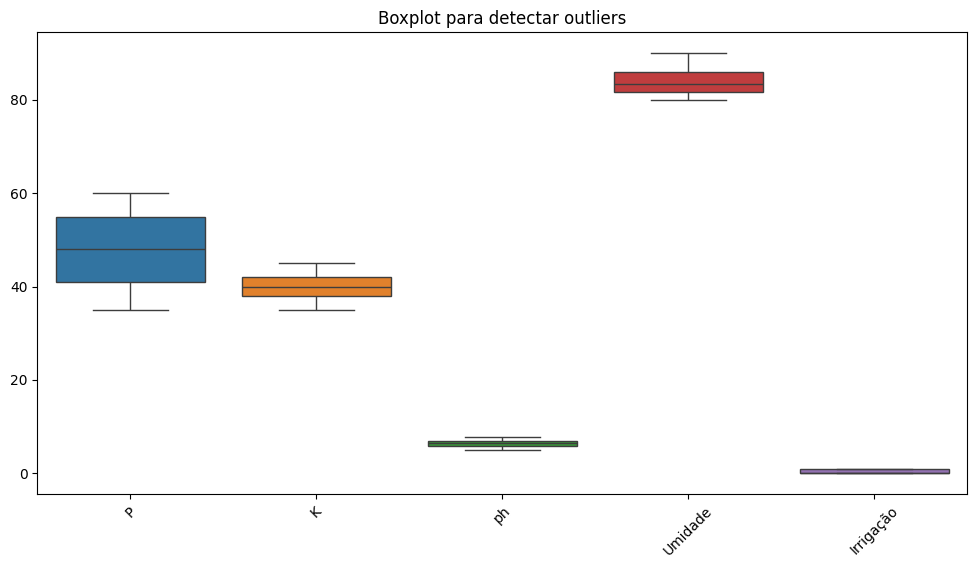

In [7]:
plt.figure (figsize= (12, 6))
sns.boxplot (data=df)
plt.title ("Boxplot para detectar outliers")
plt.xticks (rotation= 45) 
plt.show ()

In [8]:
# Média
mean_values = df.mean()
print("Média:\n", mean_values)

# Desvio padrão
std_values = df.std()
print("\nDesvio Padrão:\n", std_values)

# Mediana
median_values = df.median()
print("\nMediana:\n", median_values)

# Moda
mode_values = df.mode().iloc[0]
print("\nModa:\n", mode_values)

# Quartis
quartiles = df.quantile([0.25, 0.5, 0.75])
print("\nQuartis:\n", quartiles)

Média:
 P            48.01000
K            40.04000
ph            6.42955
Umidade      83.88635
Irrigação     0.44000
dtype: float64

Desvio Padrão:
 P            7.949584
K            2.987142
ph           0.647313
Umidade      2.768217
Irrigação    0.497633
dtype: float64

Mediana:
 P            48.000
K            40.000
ph            6.415
Umidade      83.470
Irrigação     0.000
dtype: float64

Moda:
 P            35.00
K            38.00
ph            5.94
Umidade      80.30
Irrigação     0.00
Name: 0, dtype: float64

Quartis:
          P     K     ph  Umidade  Irrigação
0.25  41.0  38.0  5.940  81.7600        0.0
0.50  48.0  40.0  6.415  83.4700        0.0
0.75  55.0  42.0  6.950  85.9375        1.0


In [9]:
def plot_param(df, col):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=col, kde=True)
    plt.axvline(df[col].mean(), color='r', linestyle='--', label='Média')
    plt.axvline(df[col].median(), color='g', linestyle='--', label='Mediana')
    plt.axvline(df[col].median(), color='g', linestyle='--', label='Desvio Padrão')
    # Para encontrar a moda, pode ser necessário lidar com múltiplas modas
    mode = df[col].mode()
    if len(mode) == 1:
        plt.axvline(mode[0], color='b', linestyle='--', label='Mediana')
    plt.legend()
    plt.title(f'Distribuição de {col}')
    plt.show()

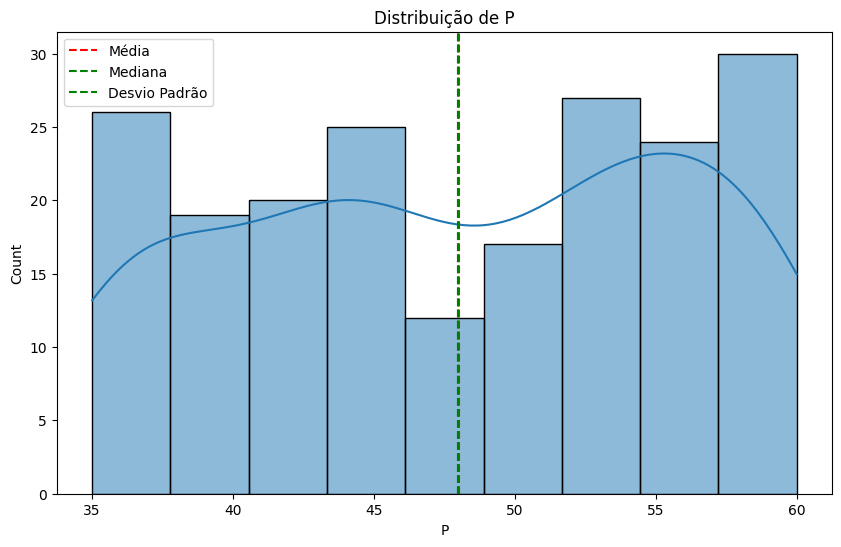

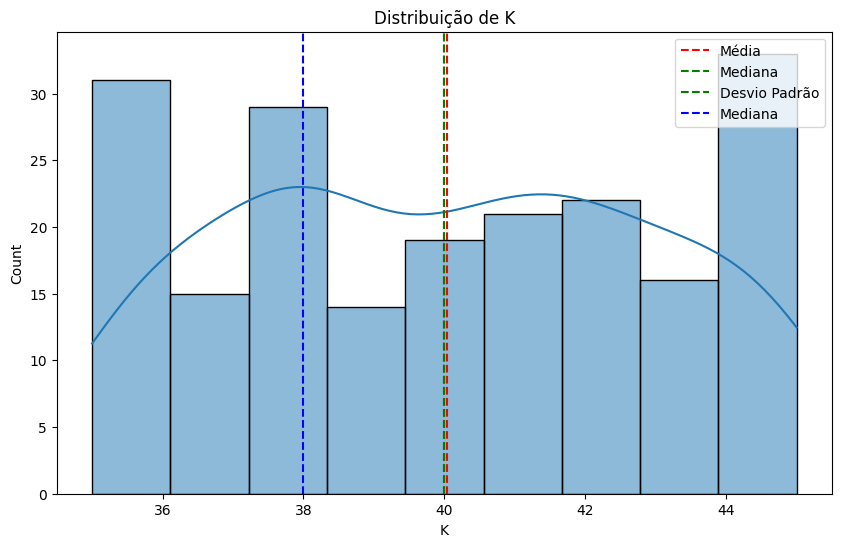

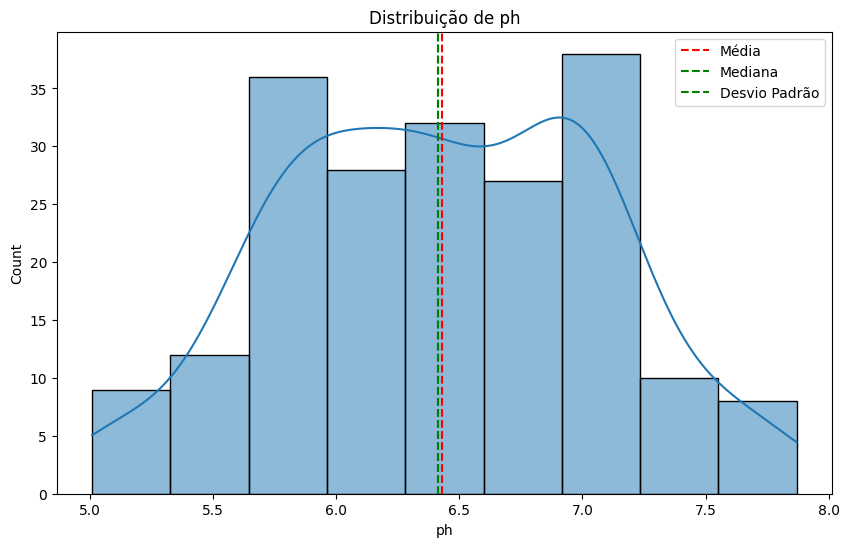

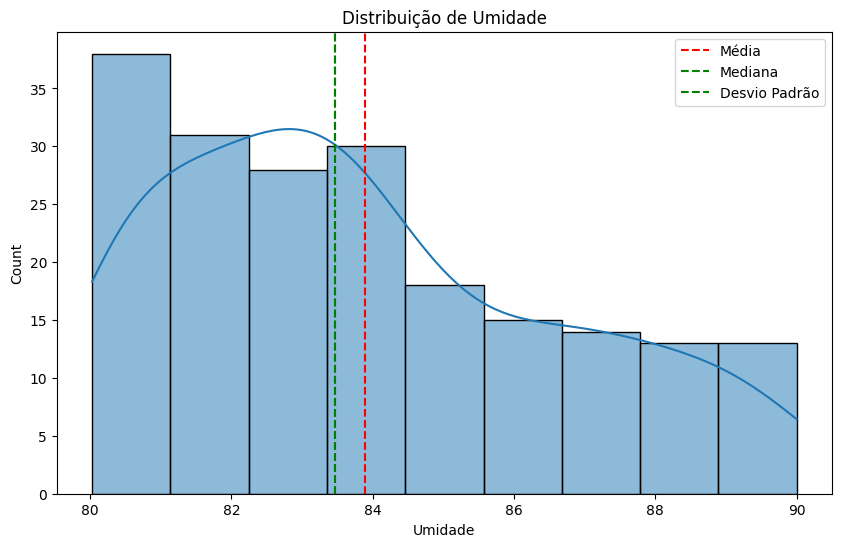

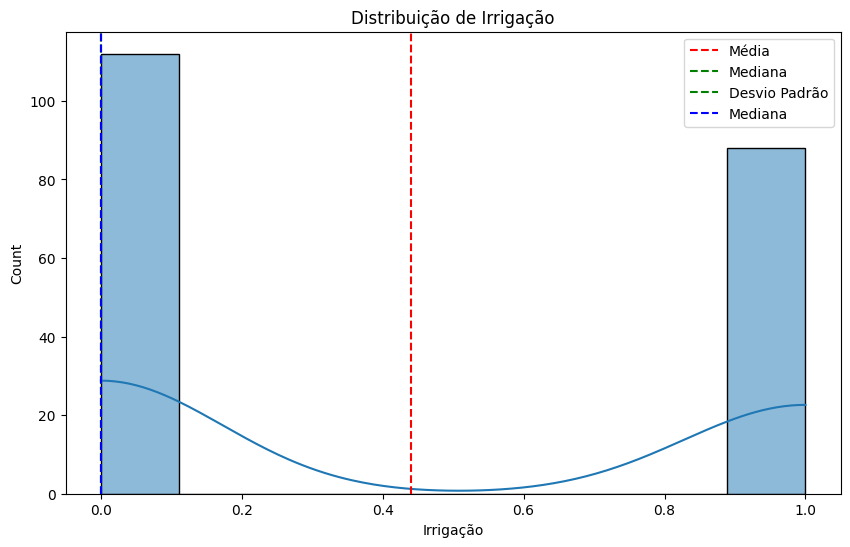

In [12]:
for col in df.select_dtypes(include=['number']).columns:
    plot_param(df, col)
    
 
    

## ANÁLISE DOS GRÁFICOS DEOS PADRÕES DE VARIÂNCIA

Estes gráficos mostram a média, mediana e desvio padrão, bem como a quantidade de vezes que um valor ou um intervalo de valores foi repetido.


### Classificação fósforo
Nessa parte classificaremos e analisaremos os valores atribuídos a variável fósforo, durante esses duzentos dias.

In [13]:
df_p_abaixo_46 = df[df['P'] < 46]
print(df_p_abaixo_46)

      P   K    ph  Umidade  Irrigação
0    42  43  6.50    82.00          1
3    35  40  6.98    80.16          1
4    42  42  7.63    81.60          1
5    37  42  7.07    83.37          0
16   38  41  6.25    82.79          1
..   ..  ..   ...      ...        ...
179  38  45  6.92    86.16          0
181  40  38  6.84    80.35          1
185  38  36  5.57    88.67          0
187  37  45  6.40    81.80          1
196  35  41  6.43    83.53          0

[84 rows x 5 columns]


In [14]:
df_p_46_50 = df[(df['P'] >= 46) & (df['P'] < 50)]
print(df_p_46_50)

      P   K    ph  Umidade  Irrigação
11   46  42  7.50    81.45          1
15   48  39  7.04    80.30          1
24   47  37  7.38    81.33          1
28   49  44  6.24    84.50          0
46   49  42  5.21    84.48          0
58   46  40  7.24    82.12          1
64   47  42  5.74    83.29          0
68   46  41  5.01    80.29          1
76   47  44  7.87    81.79          1
95   46  42  6.60    83.46          0
96   47  37  6.50    82.14          1
111  49  41  6.74    86.45          0
116  47  41  7.18    80.45          1
124  48  40  6.59    81.67          1
127  49  40  6.77    88.72          0
128  48  44  7.13    87.50          0
134  46  36  6.83    86.99          0
142  48  43  7.20    82.76          1
145  46  41  5.97    82.91          1
164  48  44  6.32    88.48          0
171  48  37  6.83    88.49          0
177  49  43  7.05    86.12          0
193  48  35  6.27    87.91          0


In [15]:
df_p_acima_50 = df[df['P'] >= 50]
print(df_p_acima_50)

      P   K    ph  Umidade  Irrigação
1    58  41  7.04    80.32          1
2    55  44  7.84    82.32          1
6    55  38  5.70    82.64          1
7    53  40  5.72    82.89          1
8    54  38  6.69    83.54          0
..   ..  ..   ...      ...        ...
194  60  35  5.89    80.46          1
195  57  45  7.12    89.13          0
197  54  45  7.16    83.70          0
198  58  39  6.43    86.69          0
199  57  37  6.08    83.49          0

[93 rows x 5 columns]


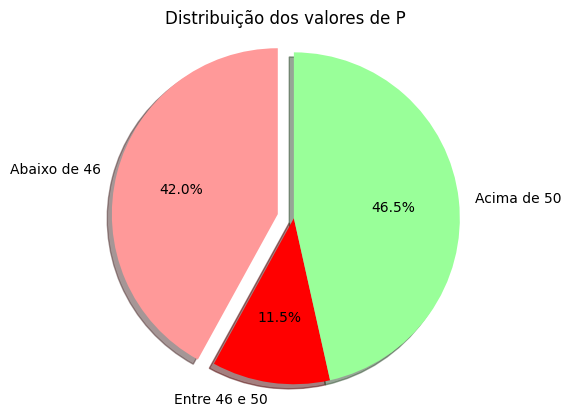

In [16]:
# Contagem dos valores abaixo de 46, entre 46 e 50, e acima de 50
below_46_count = len(df_p_abaixo_46)
between_46_and_50_count = len(df_p_46_50)
above_50_count = len(df_p_acima_50)

# Dados para o gráfico de pizza
labels = ['Abaixo de 46', 'Entre 46 e 50', 'Acima de 50']
sizes = [below_46_count, between_46_and_50_count, above_50_count]
colors = ['#ff9999', '#ff0000', '#99ff99']  

explode = (0.1, 0, 0) 

# Criando o gráfico de pizza
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
    shadow=True, startangle=90)
ax1.axis('equal') 

plt.title('Distribuição dos valores de P')
plt.show()

O gráfico é dividido em três partes verde, rosa e vermelho, sendo verde a quantidade de valores que estão dentro do intervalo ideal, vermelho é quantidade de valores que estão acima do intervalo desejado e o rosa é a quantidade de valores que estão abaixo do intervalo ideal, portanto a bomba deve ser ligada para que os valores passem a estar dentro o desejado.



### Classificação potássio
Nessa parte classificaremos e analisaremos os valores atribuídos a variável potássio, durante esses duzentos dias.

In [17]:
df_k_abaixo_39 = df[df['K'] < 39]
print(df_k_abaixo_39)

      P   K    ph  Umidade  Irrigação
6    55  38  5.70    82.64          1
8    54  38  6.69    83.54          0
9    58  38  6.34    83.03          0
13   56  36  6.98    82.06          1
14   50  37  6.95    80.66          1
..   ..  ..   ...      ...        ...
190  59  36  5.89    88.96          0
191  55  38  7.06    89.19          0
193  48  35  6.27    87.91          0
194  60  35  5.89    80.46          1
199  57  37  6.08    83.49          0

[75 rows x 5 columns]


In [18]:
df_k_39_44 = df[(df['K'] >= 39) & (df['K'] <= 44)]
print(df_k_39_44)

      P   K    ph  Umidade  Irrigação
0    42  43  6.50    82.00          1
1    58  41  7.04    80.32          1
2    55  44  7.84    82.32          1
3    35  40  6.98    80.16          1
4    42  42  7.63    81.60          1
..   ..  ..   ...      ...        ...
188  58  43  5.77    83.79          0
189  60  39  7.08    86.55          0
192  51  41  5.78    83.64          0
196  35  41  6.43    83.53          0
198  58  39  6.43    86.69          0

[110 rows x 5 columns]


In [19]:
df_k_acima_44 = df[df['K'] > 44]
print(df_k_acima_44)

      P   K    ph  Umidade  Irrigação
44   52  45  7.22    82.37          1
49   55  45  7.73    80.41          1
57   36  45  5.95    82.45          1
61   58  45  5.88    83.52          0
75   36  45  6.94    81.86          1
97   55  45  5.94    83.33          0
121  50  45  5.86    85.82          0
151  36  45  6.75    89.81          0
159  35  45  6.54    87.60          0
178  42  45  6.03    87.11          0
179  38  45  6.92    86.16          0
186  60  45  6.08    85.42          0
187  37  45  6.40    81.80          1
195  57  45  7.12    89.13          0
197  54  45  7.16    83.70          0


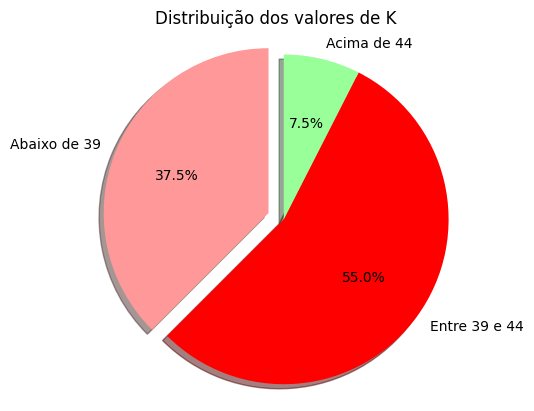

In [20]:
# Contagem dos valores de K
below_39_count = len(df_k_abaixo_39)
between_39_and_44_count = len(df_k_39_44)
above_44_count = len(df_k_acima_44)

# Dados para o gráfico de pizza
labels_k = ['Abaixo de 39', 'Entre 39 e 44', 'Acima de 44']
sizes_k = [below_39_count, between_39_and_44_count, above_44_count]
colors_k = ['#ff9999', '#ff0000', '#99ff99']  

explode_k = (0.1, 0, 0) 

# Criando o gráfico de pizza
fig2, ax2 = plt.subplots()
ax2.pie(sizes_k, explode=explode_k, labels=labels_k, colors=colors_k, autopct='%1.1f%%',
    shadow=True, startangle=90)
ax2.axis('equal') 

plt.title('Distribuição dos valores de K')
plt.show()

O gráfico é dividido em três partes verde, rosa e vermelho, sendo verde a quantidade de valores que estão dentro do intervalo ideal, vermelho é quantidade de valores que estão acima do intervalo desejado e o rosa é a quantidade de valores que estão abaixo do intervalo ideal, portanto a bomba deve ser ligada para que os valores passem a estar dentro o desejado.



### Classificação de pH
Nessa parte classificaremos e analisaremos os valores atribuídos a variável ph, durante esses duzentos dias.

In [21]:
df_ph_abaixo_5_5 = df[df['ph'] < 5.5]
print(df_ph_abaixo_5_5)

     P   K    ph  Umidade  Irrigação
10  53  40  5.39    81.42          1
12  58  44  5.11    80.89          1
21  40  43  5.07    83.12          0
33  53  38  5.01    81.64          1
46  49  42  5.21    84.48          0
50  36  43  5.29    83.06          0
68  46  41  5.01    80.29          1
77  35  38  5.01    81.98          1
84  58  39  5.45    80.54          1
86  43  38  5.11    81.43          1
88  53  42  5.18    81.04          1
99  37  40  5.33    83.60          0


In [22]:
df_ph_5_5_6_5 = df[(df['ph'] >= 5.5) & (df['ph'] <= 6.5)]
print(df_ph_5_5_6_5)

      P   K    ph  Umidade  Irrigação
0    42  43  6.50    82.00          1
6    55  38  5.70    82.64          1
7    53  40  5.72    82.89          1
9    58  38  6.34    83.03          0
16   38  41  6.25    82.79          1
..   ..  ..   ...      ...        ...
193  48  35  6.27    87.91          0
194  60  35  5.89    80.46          1
196  35  41  6.43    83.53          0
198  58  39  6.43    86.69          0
199  57  37  6.08    83.49          0

[98 rows x 5 columns]


In [23]:
df_ph_acima_6_5 = df[df['ph'] > 6.5]
print(df_ph_acima_6_5)

      P   K    ph  Umidade  Irrigação
1    58  41  7.04    80.32          1
2    55  44  7.84    82.32          1
3    35  40  6.98    80.16          1
4    42  42  7.63    81.60          1
5    37  42  7.07    83.37          0
..   ..  ..   ...      ...        ...
181  40  38  6.84    80.35          1
189  60  39  7.08    86.55          0
191  55  38  7.06    89.19          0
195  57  45  7.12    89.13          0
197  54  45  7.16    83.70          0

[90 rows x 5 columns]


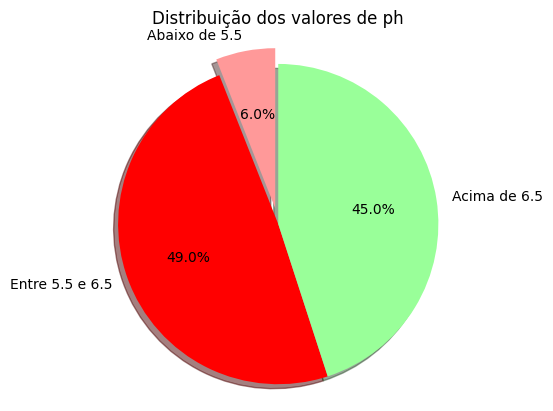

In [24]:
# Contagem dos valores de ph
below_5_5_count = len(df_ph_abaixo_5_5)
between_5_5_and_6_5_count = len(df_ph_5_5_6_5)
above_6_5_count = len(df_ph_acima_6_5)

# Dados para o gráfico de pizza
labels_ph = ['Abaixo de 5.5', 'Entre 5.5 e 6.5', 'Acima de 6.5']
sizes_ph = [below_5_5_count, between_5_5_and_6_5_count, above_6_5_count]
colors_ph = ['#ff9999', '#ff0000', '#99ff99']  

explode_ph = (0.1, 0, 0) 

# Criando o gráfico de pizza
fig3, ax3 = plt.subplots()
ax3.pie(sizes_ph, explode=explode_ph, labels=labels_ph, colors=colors_ph, autopct='%1.1f%%',
    shadow=True, startangle=90)
ax3.axis('equal') 

plt.title('Distribuição dos valores de ph')
plt.show()

O gráfico é dividido em três partes verde, rosa e vermelho, sendo verde a quantidade de valores que estão dentro do intervalo ideal, vermelho é quantidade de valores que estão acima do intervalo desejado e o rosa é a quantidade de valores que estão abaixo do intervalo ideal, portanto a bomba deve ser ligada para que os valores passem a estar dentro o desejado.



### Irrigação

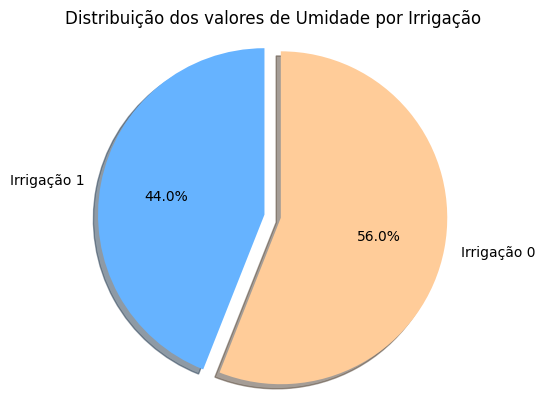

In [26]:
# Contagem dos valores de umidade com irrigação 1 e 0
irrigacao_1_count = len(df[df['Irrigação'] == 1])
irrigacao_0_count = len(df[df['Irrigação'] == 0])

# Dados para o gráfico de pizza
labels_irrigacao = ['Irrigação 1', 'Irrigação 0']
sizes_irrigacao = [irrigacao_1_count, irrigacao_0_count]
colors_irrigacao = ['#66b3ff', '#ffcc99']  
explode_irrigacao = (0.1, 0) 

# Criando o gráfico de pizza
fig_irrigacao, ax_irrigacao = plt.subplots()
ax_irrigacao.pie(sizes_irrigacao, explode=explode_irrigacao, labels=labels_irrigacao, colors=colors_irrigacao, autopct='%1.1f%%',
    shadow=True, startangle=90)
ax_irrigacao.axis('equal') 

plt.title('Distribuição dos valores de Umidade por Irrigação')
plt.show()

A irrigação possui dois tipo 1 e 0. 1 é para todos os valores que estão abaixo do valor mínimo e 0 é para todos os valores que estão acima ou igual ao mínimo, ou seja todos os valores presentes no tipo de irrigação 1 necessitam de correção, portanto a bomba deve ser ligada


### Machine learning para classificação de irrigação por umidade

A ML analisa o valor da umidade e classifica pelo tipo de irrigação, com base nos valores fornecidos e os parâmetros pre estabelecidos

In [28]:
df = pd.read_excel(r"C:\Users\pc\Desktop\BancoFase4.xlsx")
print(df)

      P   K    ph  Umidade  Irrigação
0    42  43  6.50    82.00          1
1    58  41  7.04    80.32          1
2    55  44  7.84    82.32          1
3    35  40  6.98    80.16          1
4    42  42  7.63    81.60          1
..   ..  ..   ...      ...        ...
195  57  45  7.12    89.13          0
196  35  41  6.43    83.53          0
197  54  45  7.16    83.70          0
198  58  39  6.43    86.69          0
199  57  37  6.08    83.49          0

[200 rows x 5 columns]


In [29]:
print(df.columns)

Index(['P', 'K', 'ph', 'Umidade', 'Irrigação'], dtype='object')


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   P          200 non-null    int64  
 1   K          200 non-null    int64  
 2   ph         200 non-null    float64
 3   Umidade    200 non-null    float64
 4   Irrigação  200 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 7.9 KB


In [31]:
df = df.drop(columns=['P', 'K', 'ph'])
print(df)

     Umidade  Irrigação
0      82.00          1
1      80.32          1
2      82.32          1
3      80.16          1
4      81.60          1
..       ...        ...
195    89.13          0
196    83.53          0
197    83.70          0
198    86.69          0
199    83.49          0

[200 rows x 2 columns]


Definindo a coluna alvo

In [32]:
X = df[['Umidade']]
y = df['Irrigação'] # Variável alvo

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

Dividindo o dataset em treino e teste

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Tamanho do conjunto de dados original: {X.shape}')
print(f'Tamanho do conjunto de treinamento: {X_train.shape}')
print(f'Tamanho do conjunto de teste: {X_test.shape}')

Tamanho do conjunto de dados original: (200, 1)
Tamanho do conjunto de treinamento: (160, 1)
Tamanho do conjunto de teste: (40, 1)


In [35]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("Acurácia KNN:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

Acurácia KNN: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [36]:
def prever_irrigacao(umidade):
    # Cria um DataFrame com o valor de umidade fornecido
    df_teste = pd.DataFrame({'Umidade': [umidade]})
    
    # Faz a previsão usando o modelo KNN treinado
    previsao = knn.predict(df_teste)
    
    # Retorna a previsão
    return previsao[0]

# Testando a função com um valor de umidade
umidade_teste = 50.0
resultado = prever_irrigacao(umidade_teste)
print(f'Previsão de irrigação para umidade {umidade_teste}: {resultado}')

Previsão de irrigação para umidade 50.0: 1
